In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'

#suffix = 'ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p97_Theta70'
suffix = 'ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p965_Theta70'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
#sig_histo2 = util.load(f'{prefix}/signal_BDT_ABCD_goodvtx_v10_NJetG0L3_OSSF.coffea')[0]

## Signal

In [6]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [7]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'OSSF',
 'theta < 70',
 'BDT']

In [8]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [9]:
table = eff_cutflow
table.columns = cutnames

In [10]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [11]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [12]:
table = cts_cutflow
table.columns = cutnames

In [13]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,27.5180,27.4900,26.5657,26.5657,26.2251,25.5668,21.3732,9.0638
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",666.7773,666.1743,642.8489,642.8489,635.0341,617.6829,546.6917,271.4470
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",827.0445,825.9792,797.3672,797.3672,787.3198,767.1020,689.5404,345.1078
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,45.9089,45.8901,44.1806,44.1744,43.5820,42.4655,37.1571,18.4106
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,102.7526","1,102.0333","1,064.7355","1,064.7355","1,050.8564","1,018.2555",934.1113,488.6934
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","1,478.2941","1,477.9960","1,424.9048","1,424.9048","1,406.4192","1,361.3700","1,261.7544",691.2547
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",714.5297,714.5297,687.9354,687.9354,680.3314,656.2454,629.6533,368.6471
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","11,685.7826","11,685.7826","11,173.1411","11,173.1411","10,978.4487","10,359.8293","9,688.3497","4,313.3368"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,107.2824,107.2824,103.1451,103.1451,102.3719,99.0149,92.0322,53.7694
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","2,237.3733","2,234.0401","2,160.7601","2,160.7601","2,126.5131","2,065.1446","1,939.5322","1,151.9707"


In [14]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [15]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [16]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [17]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


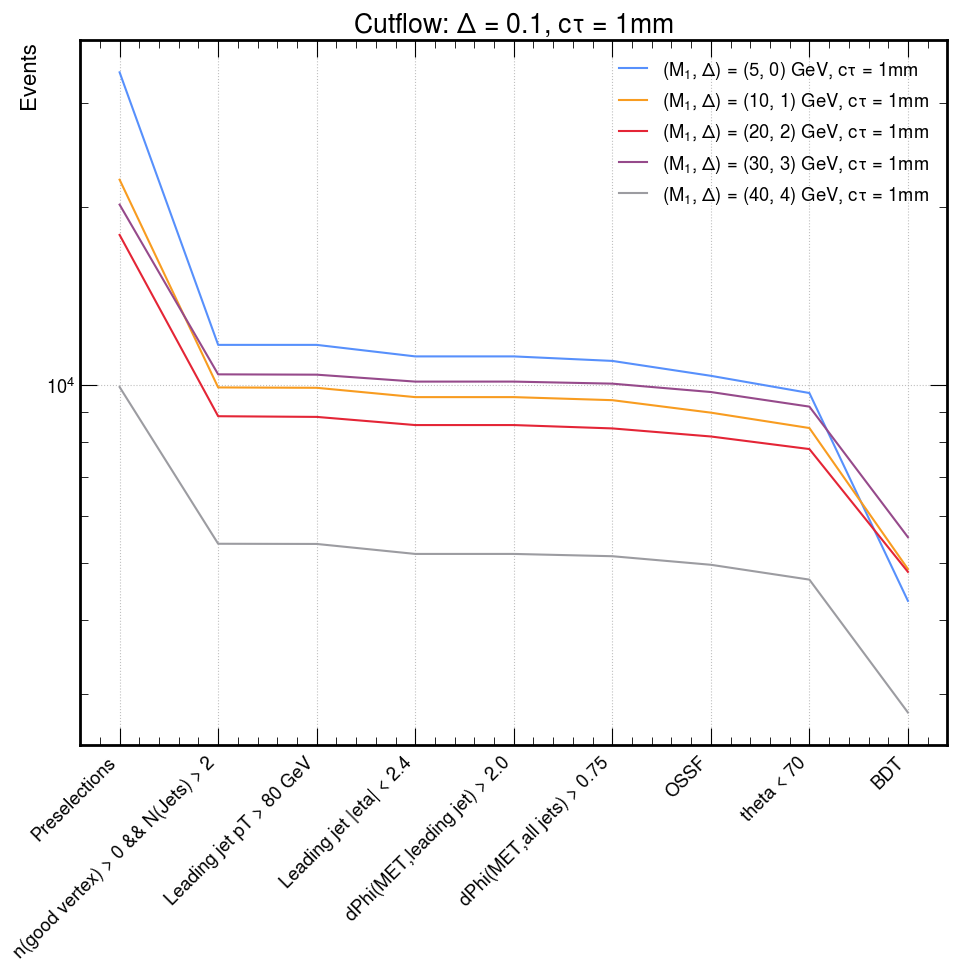

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


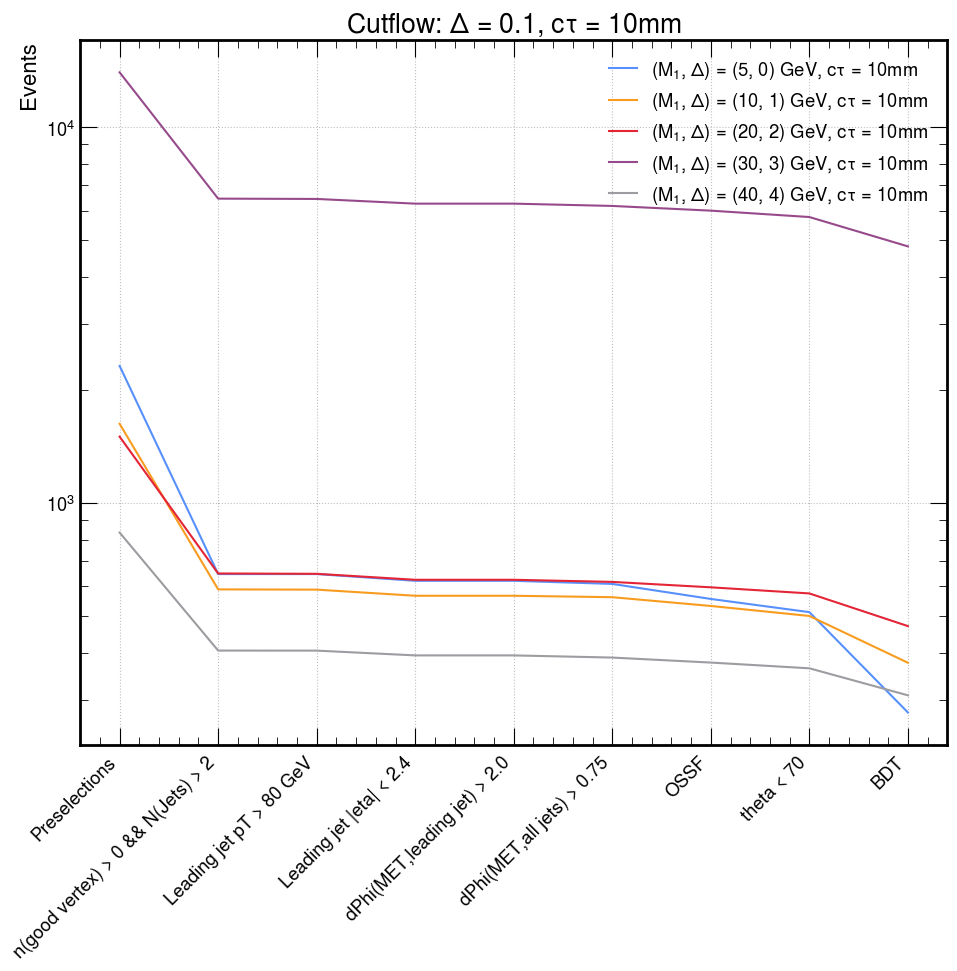

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


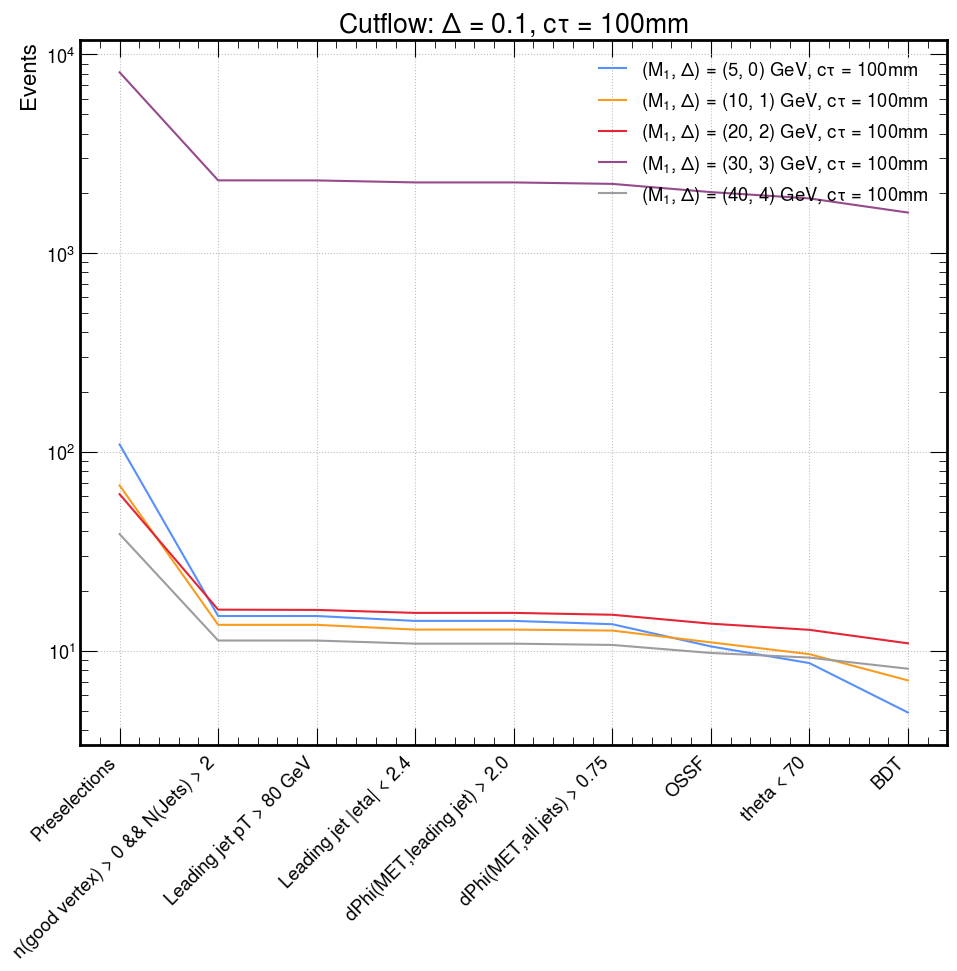

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


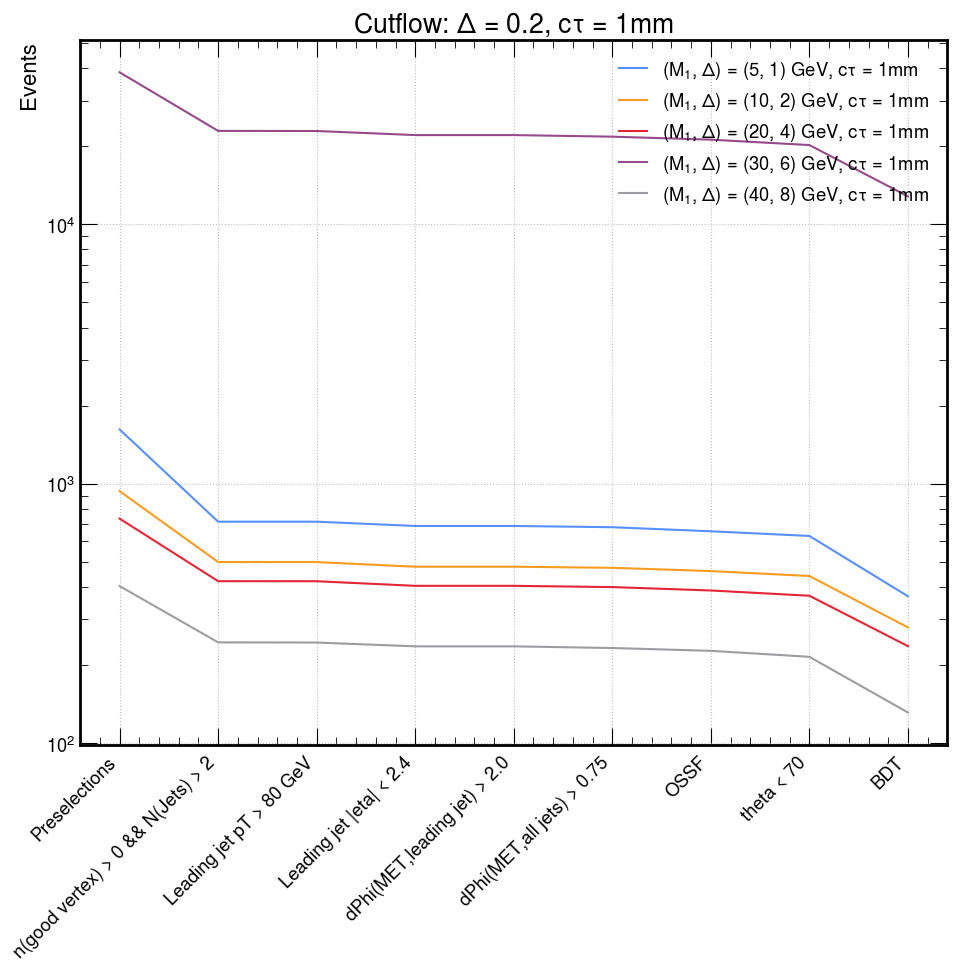

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


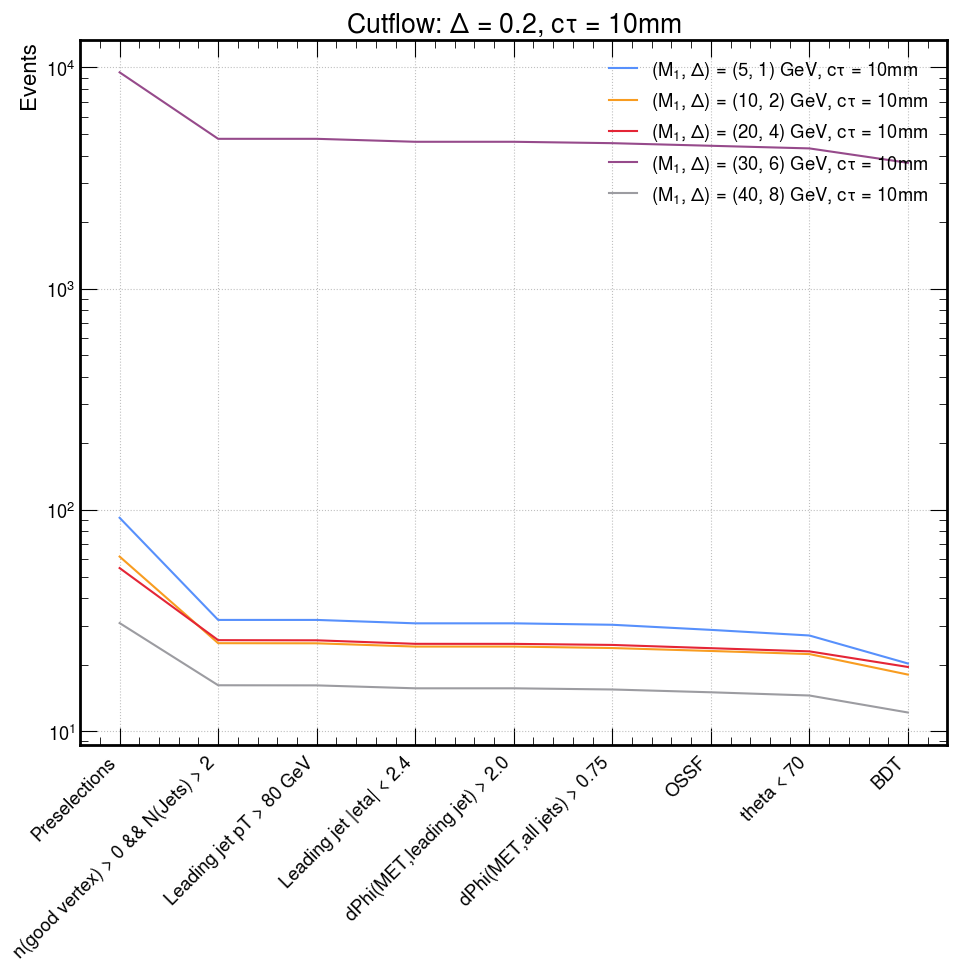

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


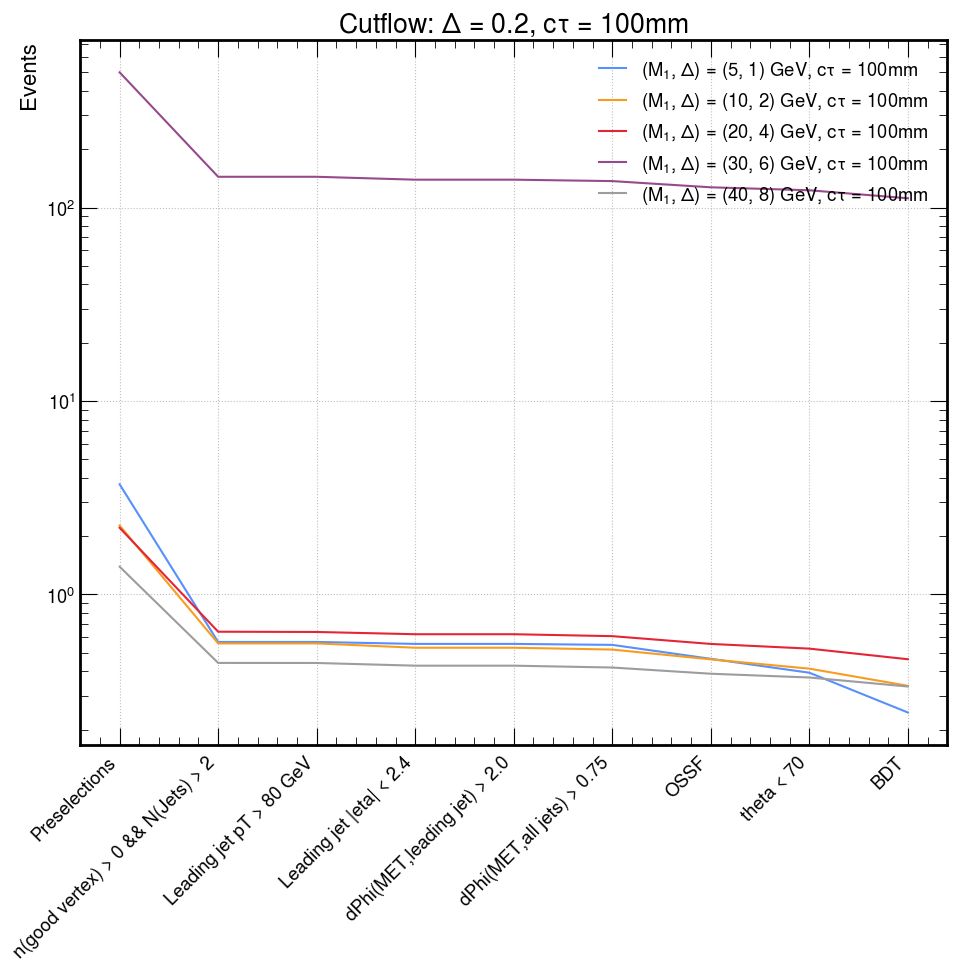

In [18]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


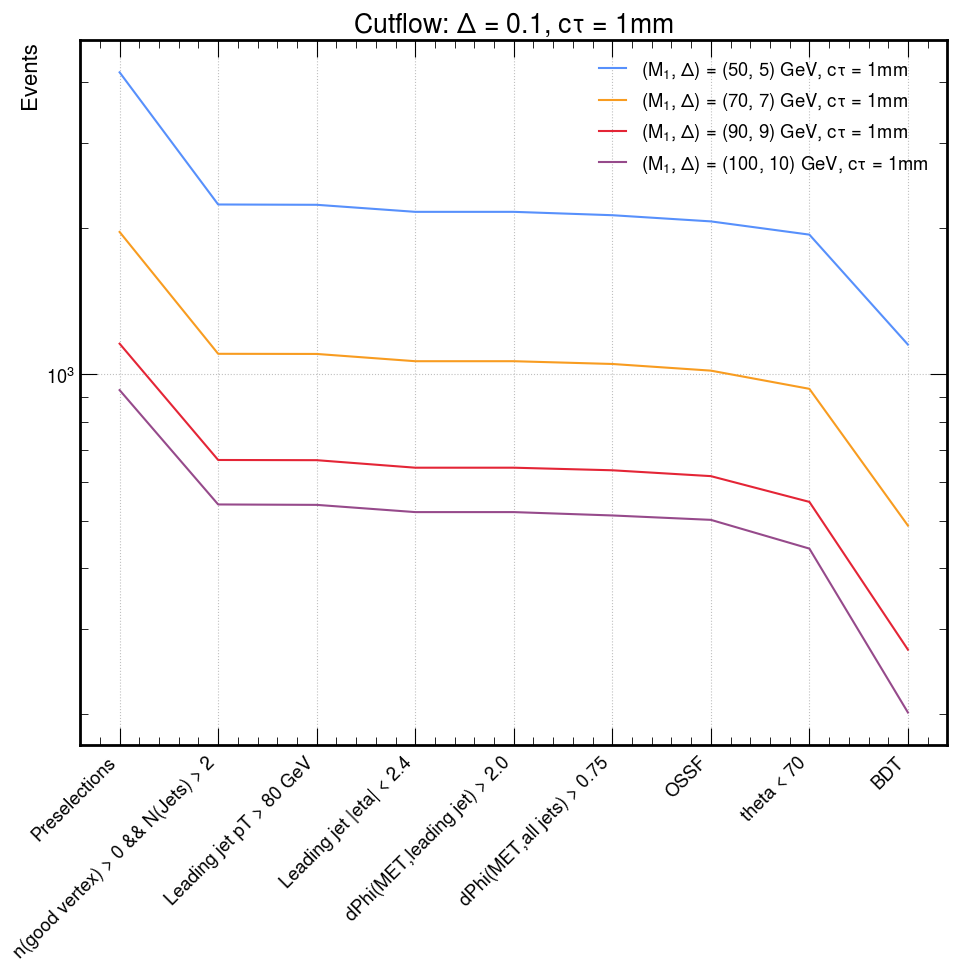

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


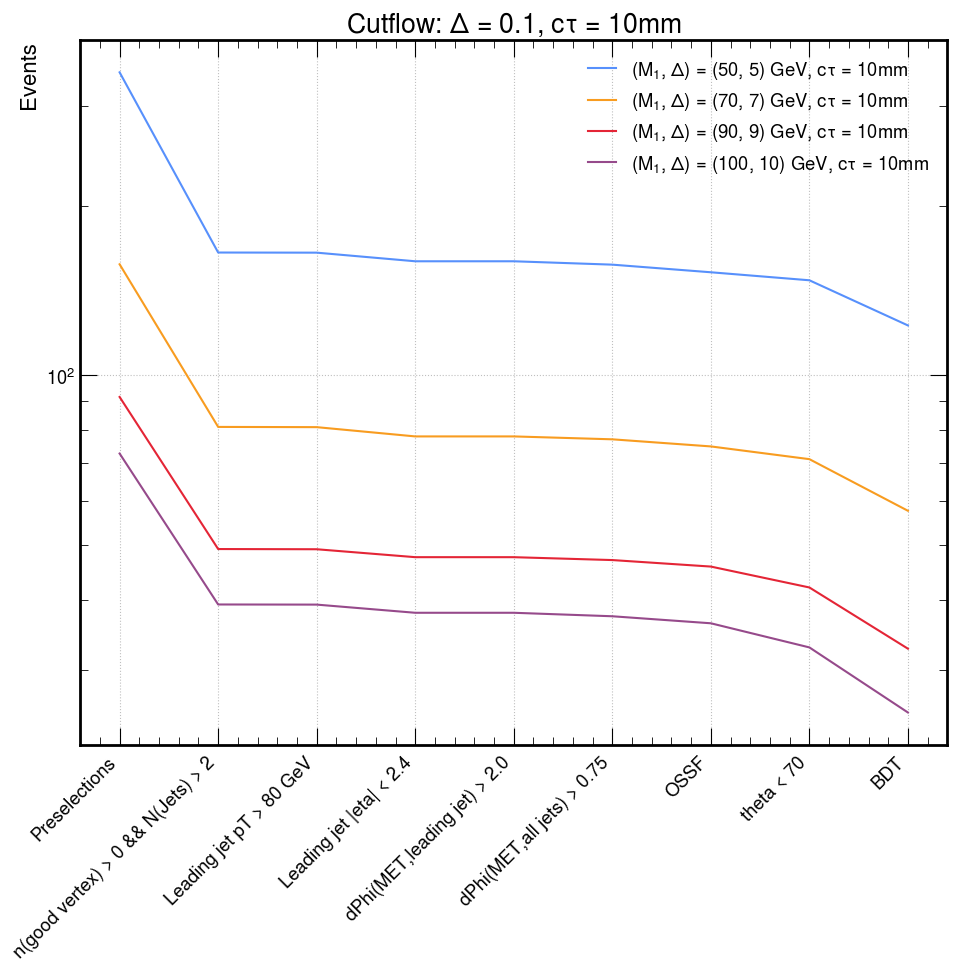

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


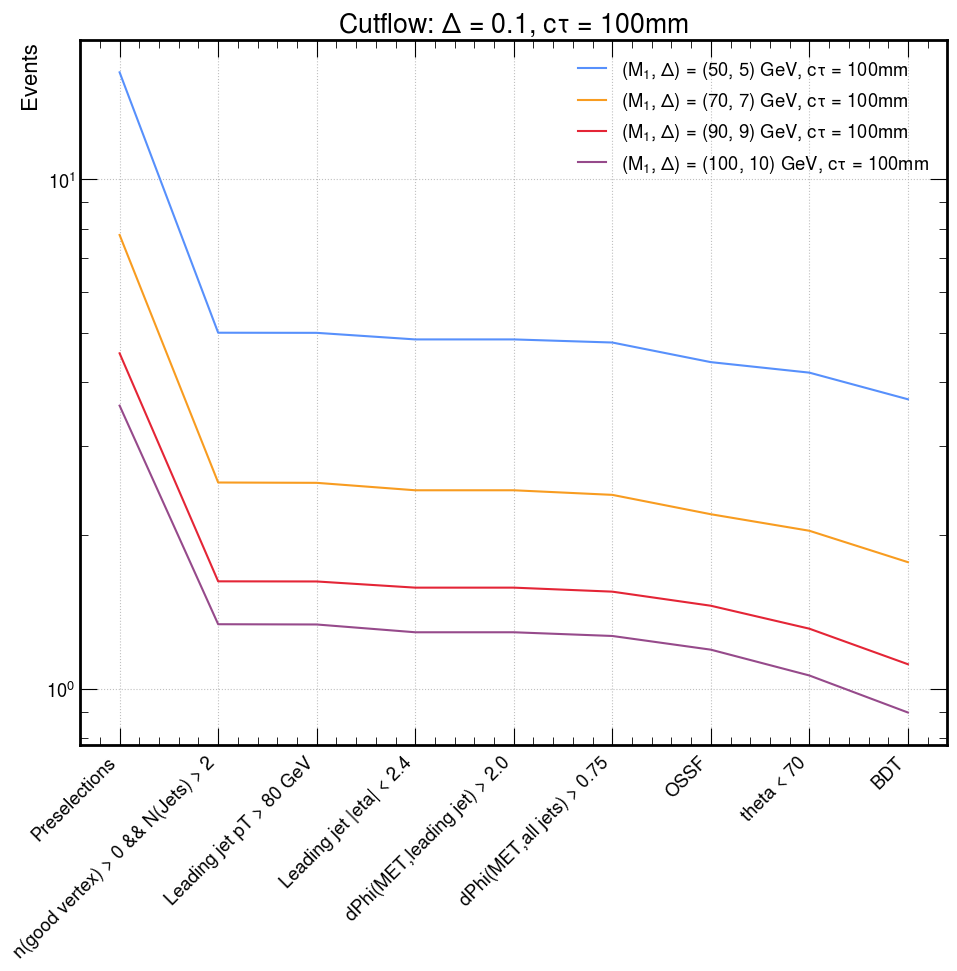

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


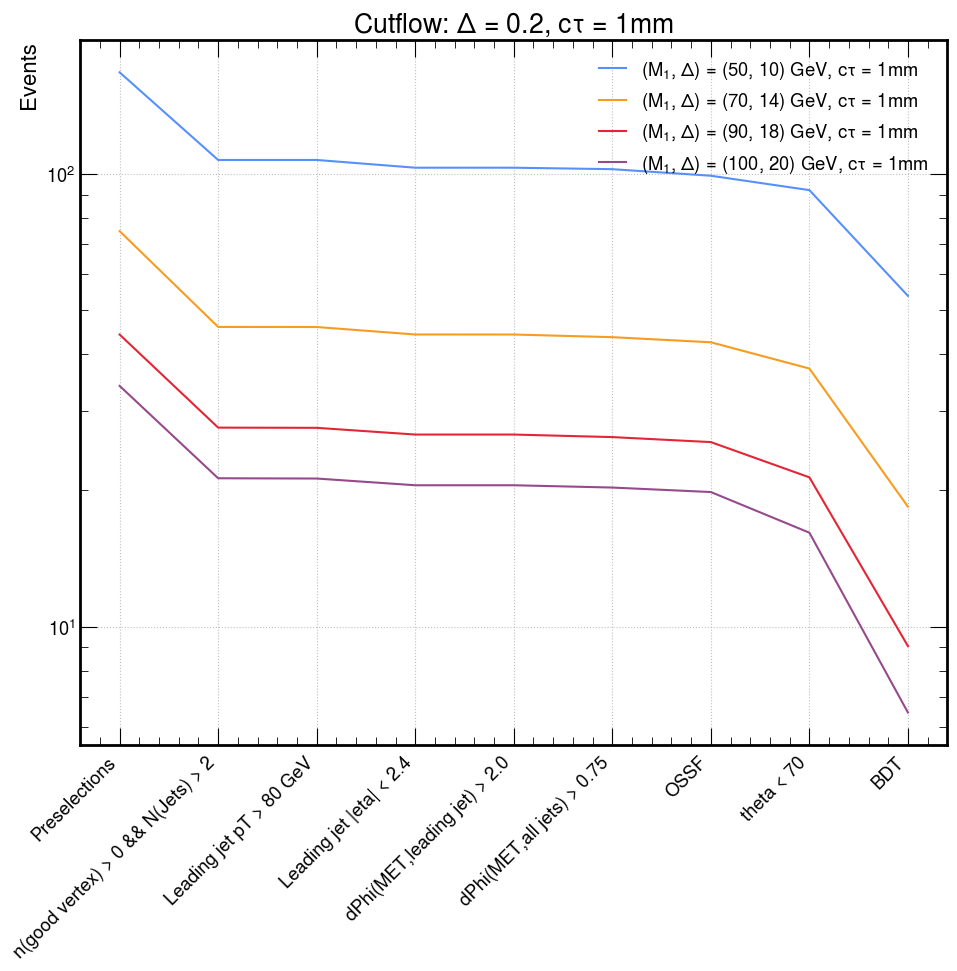

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


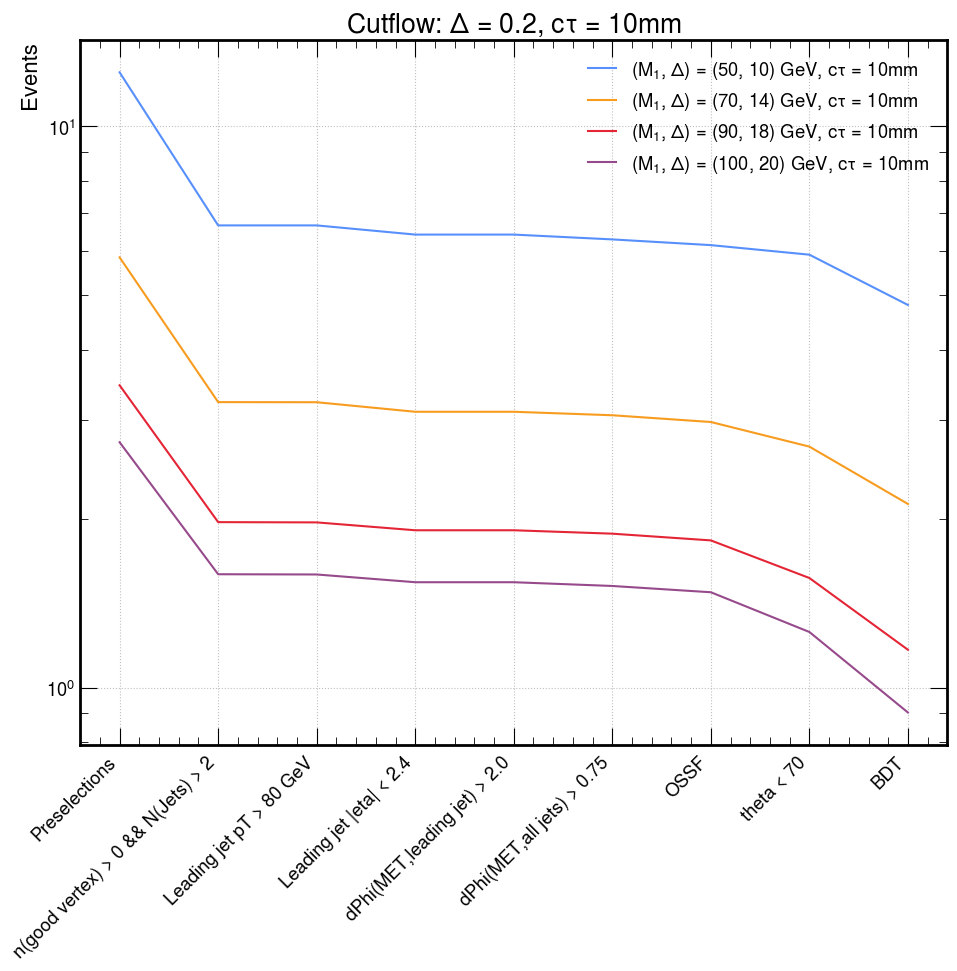

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


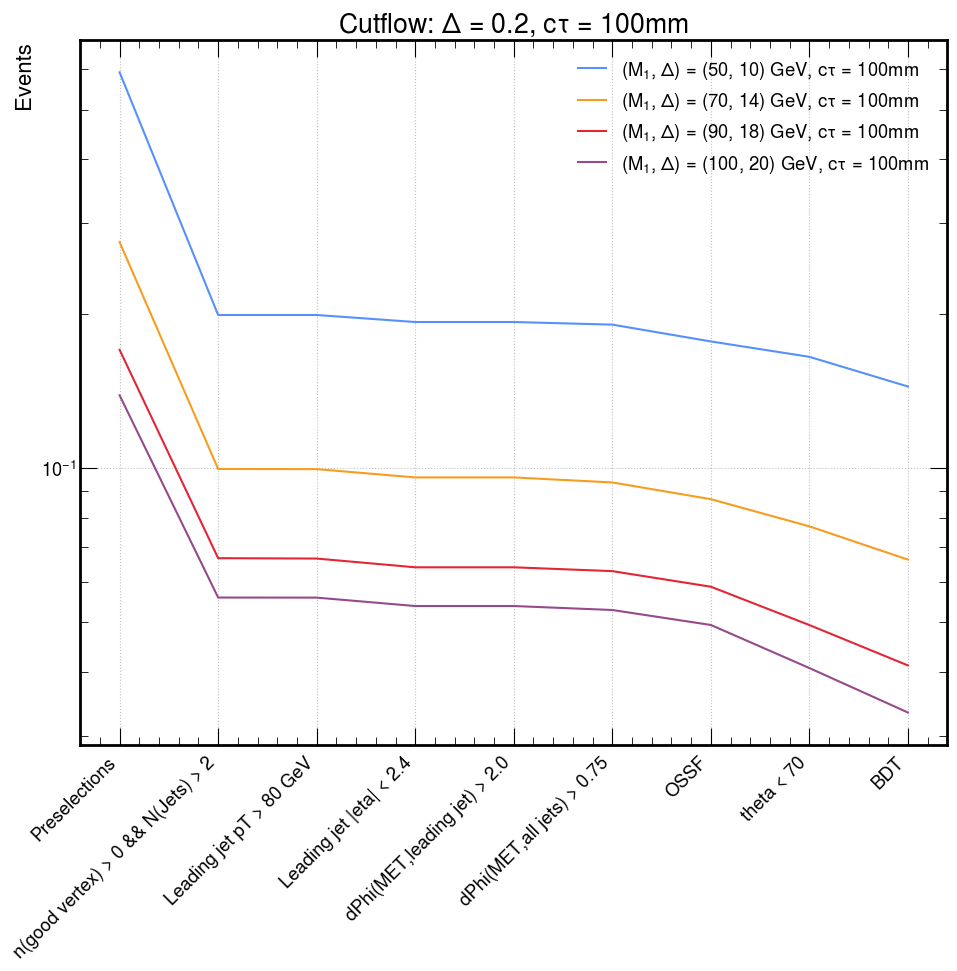

In [19]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Signal purity

In [ ]:
purity_v11 = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')

In [ ]:
purity_v11_reco = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_fromReco')

In [ ]:
purity_v10 = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched')

In [ ]:
purity_v10_reco = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched_fromReco')

In [ ]:
ct = 10
delta = 0.2

In [ ]:
table = purity_v11

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [ ]:
table = purity_v10

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [ ]:
plt.plot(m_list, purity_v10_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')


plt.grid()
plt.ylim([0.5,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(All events after the cut)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

In [ ]:
table = purity_v11_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [ ]:
table = purity_v10_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [ ]:
plt.plot(m_list, purity_v10_reco_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')

plt.grid()
plt.ylim([0.8,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(Events with ee reconstructed)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

## Background

In [20]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
Multiboson,0.00065832,0.00003441,0.00003004,0.00002763,0.00002678,0.00002517,0.00001774,0.00000721,0.00000000
Top,0.00039885,0.00001298,0.00001210,0.00001090,0.00001077,0.00000985,0.00000627,0.00000294,0.00000004
DY,0.00018701,0.00001151,0.00001141,0.00001094,0.00001083,0.00000952,0.00000760,0.00000367,0.00000005
WJets,0.00101318,0.00003720,0.00003665,0.00003480,0.00003459,0.00003180,0.00001672,0.00000771,0.00000008
ZGamma,0.00032468,0.00001653,0.00001398,0.00001313,0.00001310,0.00001314,0.00000881,0.00000478,0.00000000
QCD,0.00000249,0.00000001,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000,0.00000000,0.00000000
ZJets,0.00242159,0.00007613,0.00007541,0.00007141,0.00007118,0.00006654,0.00003517,0.00001608,0.00000025
Total,0.00001696,0.00000054,0.00000052,0.00000049,0.00000049,0.00000044,0.00000024,0.00000011,0.00000000


In [21]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p965_Theta70/Cutflow/Efficiency//Background_Efficiency.csv


In [22]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
Multiboson,"4,588.16",239.80,209.34,192.59,186.67,175.45,123.66,50.25,0.00
Top,"26,174.93",851.60,793.75,715.64,706.97,646.17,411.66,192.83,2.47
DY,"5,819.49",358.21,355.08,340.58,337.02,296.39,236.56,114.17,1.61
WJets,"214,692.24","7,883.42","7,765.40","7,373.78","7,330.01","6,739.24","3,542.39","1,633.62",16.05
ZGamma,"1,665.13",84.77,71.71,67.31,67.20,67.41,45.16,24.51,0.00
QCD,"53,432.27",275.55,275.55,214.93,206.03,32.90,16.05,0.00,0.00
ZJets,"63,745.58","2,003.91","1,985.06","1,879.87","1,873.73","1,751.69",925.74,423.19,6.54
Total,"370,117.80","11,697.26","11,455.88","10,784.71","10,707.63","9,709.25","5,301.23","2,438.56",26.67


In [23]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p965_Theta70/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [24]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
Multiboson,25187,1310,1106,1027,966,905,641,254,0
Top,703976,21950,20178,18131,17729,16114,10382,4845,57
DY,296131,7134,7103,6985,6640,4563,3734,1802,24
WJets,1177020,21199,20944,20158,19793,16850,8815,4106,42
ZGamma,6506,343,307,292,279,252,158,75,0
QCD,31490,92,92,90,88,6,2,0,0
ZJets,738994,12563,12452,11965,11824,10144,5327,2436,43
Total,2979304,64591,62182,58648,57319,48834,29059,13518,166


In [25]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
Multiboson,25187,1310,1106,1027,966,905,641,254,0
Top,703976,21950,20178,18131,17729,16114,10382,4845,57
DY,296131,7134,7103,6985,6640,4563,3734,1802,24
WJets,1177020,21199,20944,20158,19793,16850,8815,4106,42
ZGamma,6506,343,307,292,279,252,158,75,0
QCD,31490,92,92,90,88,6,2,0,0
ZJets,738994,12563,12452,11965,11824,10144,5327,2436,43
Total,2979304,64591,62182,58648,57319,48834,29059,13518,166


In [26]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p965_Theta70/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [27]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 26.67


In [28]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Multiboson,Top,DY,WJets,ZGamma,QCD,ZJets,Total
Weighted Counts,0.00,2.47,1.61,16.05,0.00,0.00,6.54,26.67
Raw Counts,0.00,57.00,24.00,42.00,0.00,0.00,43.00,166.00


In [29]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-3]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-3]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Multiboson,Top,DY,WJets,ZGamma,QCD,ZJets,Total
Weighted Counts,123.66,411.66,236.56,"3,542.39",45.16,16.05,925.74,"5,301.23"
Raw Counts,641.00,"10,382.00","3,734.00","8,815.00",158.00,2.00,"5,327.00","29,059.00"


Saved: ./plots/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p965_Theta70/cutflow//Cutflow_background.png


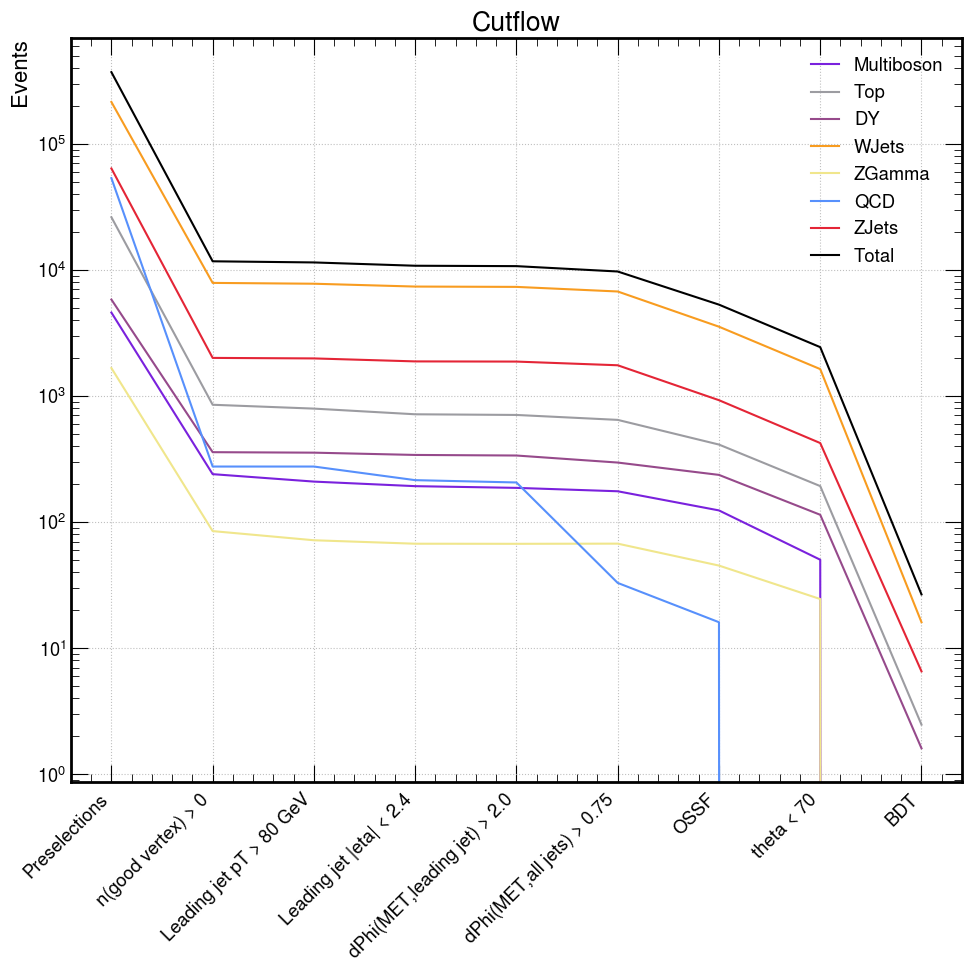

In [30]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

Saved: ./plots/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p965_Theta70/cutflow//Cutflow_background.png


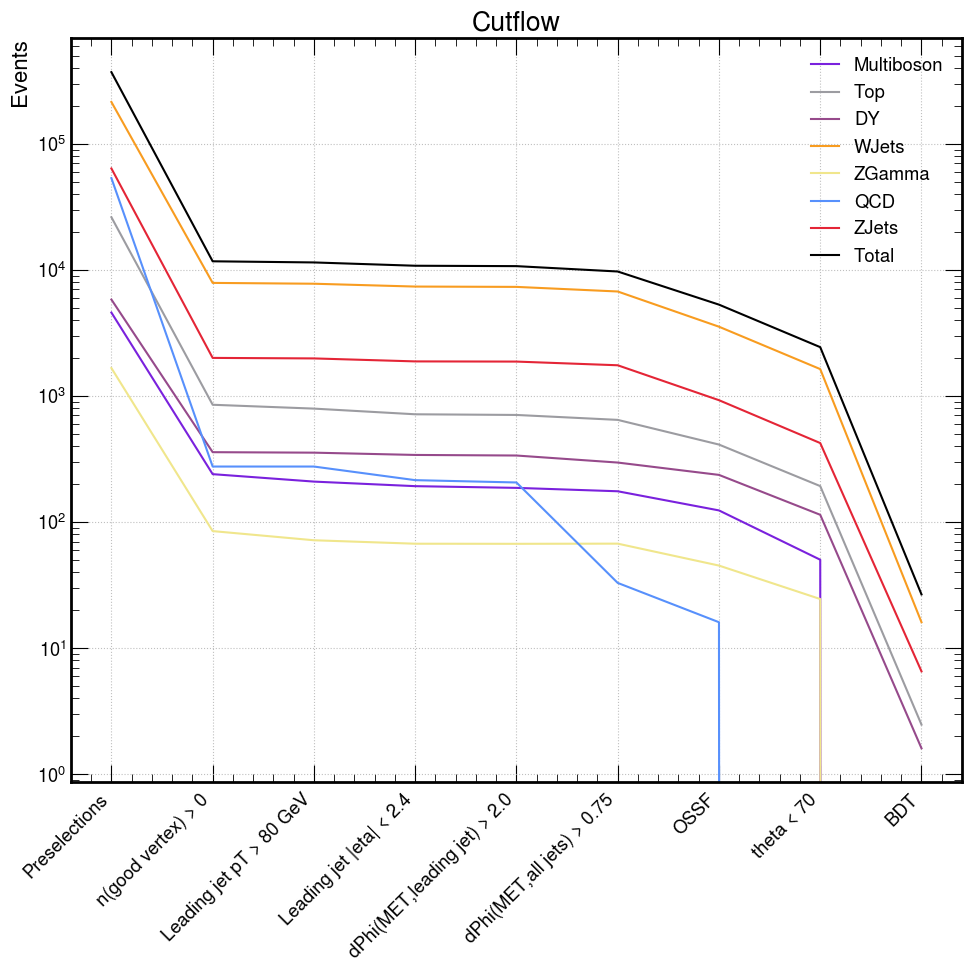

In [31]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/B

In [32]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

26.668302132836722

In [33]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [34]:
pd.options.display.float_format = '{:,.4f}'.format


In [35]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,0.2451,5.0000,0.2000,100.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,368.6471,5.0000,0.2000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,4.8882,5.0000,0.1000,100.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"4,313.3368",5.0000,0.1000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,277.2136,5.0000,0.1000,10.0000
...,...,...,...,...
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,25.2663,100.0000,0.1000,10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,0.9037,100.0000,0.2000,10.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.8982,100.0000,0.1000,100.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,201.5388,100.0000,0.1000,1.0000


In [36]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [37]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0000,0.2000,100.0000,0.2451,26.6683,0.0475
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,368.6471,26.6683,71.3860
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,4.8882,26.6683,0.9466
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"4,313.3368",26.6683,835.2485
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,277.2136,26.6683,53.6805
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,100.0000,0.2000,10.0000,0.9037,26.6683,0.1750
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,100.0000,0.1000,100.0000,0.8982,26.6683,0.1739
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,201.5388,26.6683,39.0266
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,100.0000,0.2000,1.0000,6.4669,26.6683,1.2523


In [38]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


In [39]:
ct = 1.0


In [40]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"4,313.3368",26.6683,835.2485
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"4,882.4417",26.6683,945.4518
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"4,828.8592",26.6683,935.0759
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"5,527.8465",26.6683,"1,070.4300"
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"2,792.9874",26.6683,540.8431
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,"1,151.9707",26.6683,223.0713
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,691.2547,26.6683,133.8568
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,488.6934,26.6683,94.6322
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,345.1078,26.6683,66.8278
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,271.4470,26.6683,52.5639


In [41]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,368.6471,26.6683,71.3860
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,279.6158,26.6683,54.1457
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,236.8259,26.6683,45.8597
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"12,816.1886",26.6683,"2,481.7681"
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,131.4128,26.6683,25.4472
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,53.7694,26.6683,10.4121
62,60.0,0.2,1.0,0.0000,26.6683,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,18.4106,26.6683,3.5651
65,80.0,0.2,1.0,0.0000,26.6683,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,9.0638,26.6683,1.7551


In [42]:
ct = 10.0


In [43]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,277.2136,26.6683,53.6805
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,376.0213,26.6683,72.8140
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,470.6424,26.6683,91.1367
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"4,819.6740",26.6683,933.2972
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,307.9691,26.6683,59.6361
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,122.6482,26.6683,23.7500
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,78.9857,26.6683,15.2950
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,57.5600,26.6683,11.1461
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,42.3864,26.6683,8.2078
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,32.7841,26.6683,6.3484


In [44]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,20.2210,26.6683,3.9157
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,18.0184,26.6683,3.4891
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,19.5067,26.6683,3.7773
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"3,707.3807",26.6683,717.9092
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,12.1430,26.6683,2.3514
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,4.8071,26.6683,0.9309
63,60.0,0.2,10.0,0.0000,26.6683,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,2.1254,26.6683,0.4116
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.5186,26.6683,0.2941
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,1.1689,26.6683,0.2264


In [45]:
ct = 100.0


In [46]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,4.8882,26.6683,0.9466
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,7.0903,26.6683,1.3730
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,10.8941,26.6683,2.1096
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,601.8899",26.6683,310.1951
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,8.1175,26.6683,1.5719
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.6981,26.6683,0.7161
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.4660,26.6683,0.4775
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.7716,26.6683,0.3431
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.3979,26.6683,0.2707
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,1.1171,26.6683,0.2163


In [47]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.2451,26.6683,0.0475
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.3368,26.6683,0.0652
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.4620,26.6683,0.0895
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,111.6113,26.6683,21.6128
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.3339,26.6683,0.0647
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1441,26.6683,0.0279
64,60.0,0.2,100.0,0.0000,26.6683,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0662,26.6683,0.0128
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0564,26.6683,0.0109
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0412,26.6683,0.0080
